In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Generate synthetic non-linear dataset
np.random.seed(0)
X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(0, 0.2, 100)

# Reshape for consistency
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)


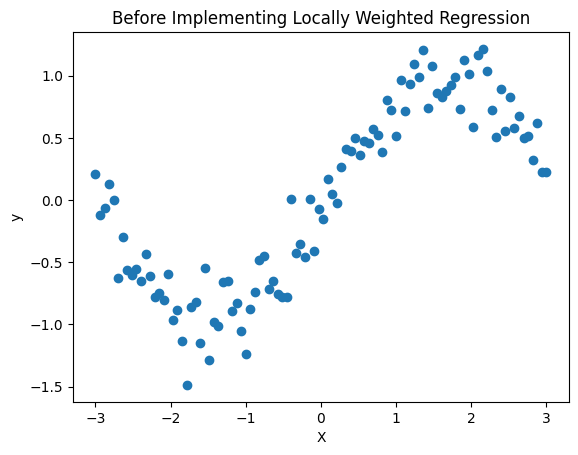

In [4]:
plt.figure()
plt.scatter(X, y)
plt.title("Before Implementing Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [5]:
def locally_weighted_regression(X, y, x_query, tau):
    """
    X       : Training data (n x 1)
    y       : Target values (n x 1)
    x_query : Point to predict
    tau     : Bandwidth parameter
    """
    m = X.shape[0]
    
    # Add bias term
    X_b = np.hstack((np.ones((m, 1)), X))
    x_q = np.array([1, x_query])
    
    # Weight matrix
    W = np.zeros((m, m))
    for i in range(m):
        diff = X[i] - x_query
        W[i, i] = np.exp(-(diff ** 2) / (2 * tau ** 2))
    
    # Closed-form solution
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    
    return x_q @ theta


In [6]:
tau = 0.4  # Bandwidth
y_pred = []

for x in X:
    y_pred.append(locally_weighted_regression(X, y, x[0], tau))

y_pred = np.array(y_pred)


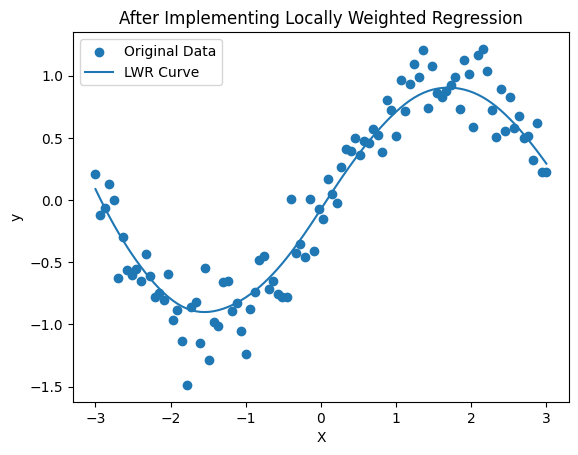

In [7]:
plt.figure()
plt.scatter(X, y, label="Original Data")
plt.plot(X, y_pred, label="LWR Curve")
plt.title("After Implementing Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
